# **THE SPARKS FOUNDATION TASK-II** 
> # K-means implementation of pytorch

## Downloading the dataset
**Using urlretrieve function, from the urllib.request module.**

In [6]:
from urllib.request import urlretrieve

In [7]:
urlretrieve('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv', 'iris_data.csv')

('iris_data.csv', <http.client.HTTPMessage at 0x7efc7ab5d050>)

# EXPLORING THE DATASET

In [8]:
df = pd.read_csv('iris_data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# INSTALLING NECESSARY LIBRARIES

In [10]:
!pip install kmeans-pytorch

In [11]:
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
from kmeans_pytorch import kmeans, kmeans_predict
import torch.utils.data as data_utils

#ImageFolder class for using directory structure.
#from torchvision.datasets import ImageFolder
#from torchvision.transforms import ToTensor

With the seed reset (every time), the same set of numbers will appear every time.

If the random seed is not reset, different numbers appear with every invocation. i.e if I call np.random.rand(4) with random

[random_seed_explained](https://www.sharpsightlabs.com/blog/numpy-random-seed/)

# Converting raw data into pytorch Tensors.

In [13]:
df = pd.read_csv('iris_data.csv')
target_df = df[['species']]
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [15]:
df_tensor = torch.tensor(df.to_numpy())
#target_df = torch.tensor(target_df.to_numpy())

df_tensor


tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

I have to make my dataset in such a way that it contains the necessary flower data and a label data. 

In [60]:
#I have inherited torch.utils.data module as data_utils

class iris_dataset(data_utils.Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
    def __float__(self):
        return 0.0
    #float(self.X_data), int(self.y_data)

In [57]:
dataset = iris_dataset(df_tensor, target_df)
dataset[0:5]

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000]], dtype=torch.float64),
 tensor([[1],
         [1],
         [1],
         [1],
         [1]]))

### **Setting device as GPU if GPU is available**

In [16]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

# Applying k_means clustering

In [17]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=df_tensor, num_clusters=num_clusters, distance='euclidean', device=device
)

print(cluster_ids_x)
print(cluster_centers)

[running kmeans]: 0it [00:00, ?it/s]/opt/conda/lib/python3.7/site-packages/kmeans_pytorch/__init__.py:63: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629401553/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  selected = torch.nonzero(choice_cluster == index).squeeze().to(device)
[running kmeans]: 8it [00:00, 193.59it/s, center_shift=0.000000, iteration=8, tol=0.000100]

running k-means on cpu..
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
        2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
        2, 2, 0, 2, 2, 0])
tensor([[5.9016, 2.7484, 4.3935, 1.4339],
        [5.0060, 3.4180, 1.4640, 0.2440],
        [6.8500, 3.0737, 5.7421, 2.0711]])


In [18]:
y = df_tensor
y

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

# Making Predictions

In [19]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cpu..


In [20]:
print(cluster_ids_y)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
        2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
        2, 2, 0, 2, 2, 0])


In [22]:
import seaborn as sns

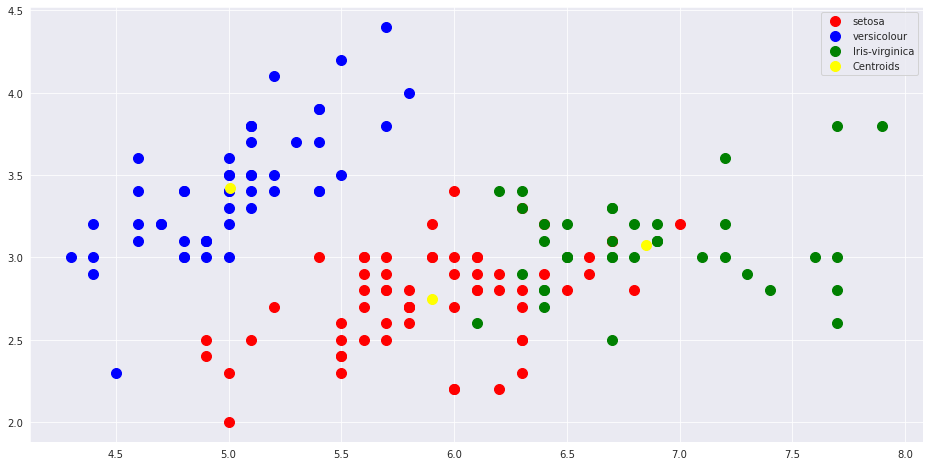

In [24]:
# Visualising the clusters - On the first two columns
sns.set_style("darkgrid")
plt.figure(figsize = (16,8))
plt.scatter(df_tensor[cluster_ids_y == 0, 0], df_tensor[cluster_ids_y == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(df_tensor[cluster_ids_y == 1, 0], df_tensor[cluster_ids_y == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(df_tensor[cluster_ids_y == 2, 0], df_tensor[cluster_ids_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

We only have 150 rows of data so we can divide our data into 2 parts, training and validation dataset(20%).

torch.manual_seed() --> Sets the seed for generating random numbers. So we can get the same validation set each time. 


[Code walkthrough of kmeans](https://mc.ai/k-means-clustering-from-scratch-2/)
and in pytorch

https://www.kernel-operations.io/keops/_auto_tutorials/kmeans/plot_kmeans_torch.html

In [39]:
project_name = 'pytorch_kmeans'

In [40]:
!pip install jovian --upgrade --quiet

In [41]:
import jovian

In [42]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/himani007/pytorch_kmeans


<IPython.core.display.Javascript object>